In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt


In [2]:
# single perceptron with n input neurons, n weigths and a bias
# To keep things simple as there is only 1 perceptron, we store weights as a
# Python vector of shape (n,) rather Nielsen's way as shape (1,n), a single row matrix.
class Perceptron(object):
    def __init__(self, n):
        self.n = n
        np.random.seed(2019)
        self.w = np.random.randn(n,)  # vector of random weights from Gaussian or Normal distribution
        self.b = np.random.randn()  # single randon value
        
    # feedforward propagates each input vector x in xs thru the network (only 1 neuron here)
    # and returns an array (list) of outputs, one for each input vector. 
    # Note that in this Perceptron we are using the step() activation function, not sigmoid()
    def feedforward(self, xs):
        res = [self.w.dot(x) + self.b for x in xs]
        return np.array([step(r) for r in res])
   
    # the following operation illustrates the training algorithm for a Perceptron
    def train(self, xs, ys, epochs, eta):
        # we use cost to record the cost or loss in the Perceptron's current performance
        # over all the training input vectors for the current epoch or training iteration.
        # This is not needed for training, but we record it to plot training progress later on.
        
        cost = np.zeros((epochs,), dtype=float)
        
        for ep in range(epochs):                
            del_w = np.zeros((self.n,), dtype=float)
            del_b = 0.0
            
            for x,y in zip(xs, ys):  
                # x is usually an input vector, xs an array of vectors, y is a single value
                # first compute weighted sum z, neuron's actual output a, and output error e
                z = self.w.dot(x) + self.b
                a = step(z)
                e = y - a     # error e = desired or target ouput less the actual output
                
                # compute the squared cost (loss) for each input and add them to compute 
                # cost for an entire training set. 
                
                cost[ep] += 0.5 * e**2
                
                # print(z, a, e, cost[ep])
                # learning formula for single perceptron with step activation
                # note del_w and x are vectors, so all the weight adjustments 
                # for a single input are computed in 1 go here
                
                del_w += eta * e * x  
                del_b += eta * e      
                                                                
            
            # Strictly should divide the sum by len(xs) to get average cost per training input
            # update the weigths and bias with cumulative update based on all the training data
            # Note that in the spreadshhet example the weights are updated after each training
            # input whereas here we update them after each epoch.
            # cost[e] = cost[e] / len(xs)
            
            self.w += del_w
            self.b += del_b
            
            # print(cost[ep])
        return cost
            

In [3]:
# step activation function        
def step(weighted_sum):
    if weighted_sum <= 0:
        return 0
    else:
        return 1
    
# sigmoid activation function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))


In [4]:
# training inputs and desired outputs for AND gate
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
targets_AND = np.array([0, 0, 0, 1])
# create a new perceptron object
p = Perceptron(2)

# see what is initial output is for the 4 possible 2-bit inputs
print(p.feedforward(inputs))

# train p to behave like AND gate
epochs = 30
cst = p.train(inputs, targets_AND, epochs, 0.1)

# check output again after training
print(p.feedforward(inputs))

[1 1 1 1]
[0 0 0 1]


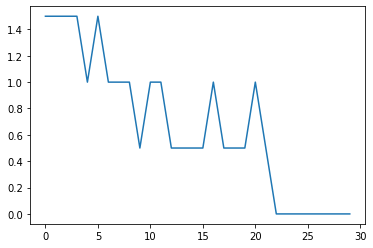

In [5]:
eps = [e for e in range(epochs)]
plt.plot(eps, cst)

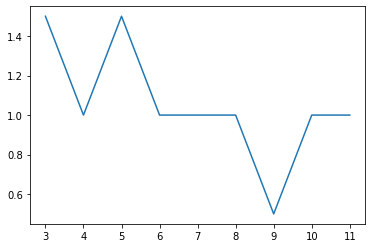

In [6]:
plt.plot(eps[3:12], cst[3:12])

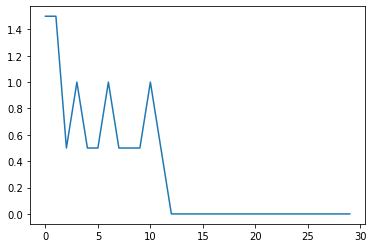

In [7]:
# try again with increased learning constant eta = 0.3
p2 = Perceptron(2)
epochs = 30
cst2 = p2.train(inputs, targets_AND, epochs, 0.3)
eps = [e for e in range(epochs)]
plt.plot(eps, cst2)

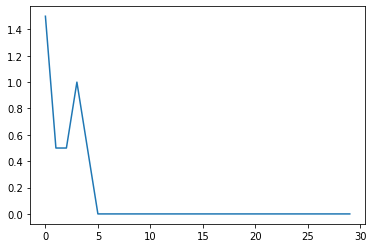

In [8]:
# try again with increased learning constant eta = 3.0
p3 = Perceptron(2)
epochs = 30
cst3 = p3.train(inputs, targets_AND, epochs, 3.0)
eps = [e for e in range(epochs)]
plt.plot(eps, cst3)

In [12]:
# Exercise 1:  train another perceptron object to act as an OR gate.
# Also experiment with the learning constant eta, trying values 1.0, 0,3 etc. 

# training inputs and desired outputs for OR gate
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
targets_OR = np.array([0, 1, 1, 1])
# create a new perceptron object
p = Perceptron(2)

# see what is initial output is for the 4 possible 2-bit inputs
print(p.feedforward(inputs))

# train p to behave like OR gate
epochs = 30
cst = p.train(inputs, targets_OR, epochs, 0.1)

# check output again after training
print(p.feedforward(inputs))   

[1 1 1 1]
[0 1 1 1]


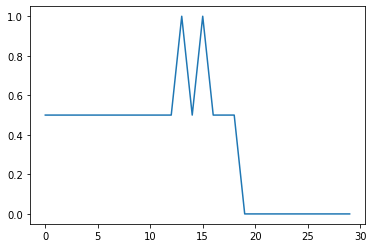

In [13]:
eps = [e for e in range(epochs)]
plt.plot(eps, cst)

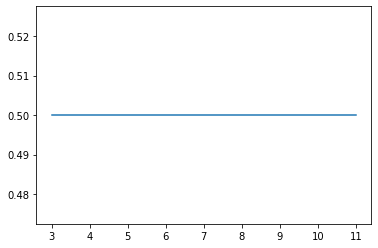

In [14]:
plt.plot(eps[3:12], cst[3:12])

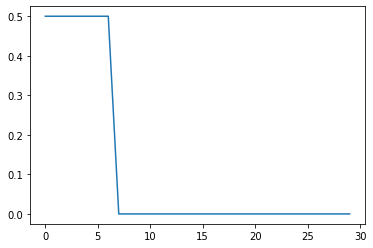

In [15]:
# try again with increased learning constant eta = 0.3
p2 = Perceptron(2)
epochs = 30
cst2 = p2.train(inputs, targets_OR, epochs, 0.3)
eps = [e for e in range(epochs)]
plt.plot(eps, cst2)

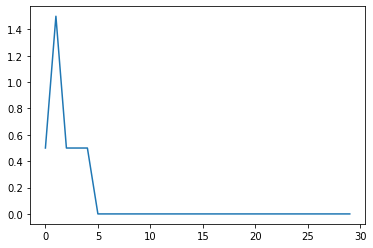

In [16]:
# try again with increased learning constant eta = 3.0
p3 = Perceptron(2)
epochs = 30
cst3 = p3.train(inputs, targets_OR, epochs, 3.0)
eps = [e for e in range(epochs)]
plt.plot(eps, cst3)

In [ ]:
# Exercise 2:  train a perceptron with 3 inputs for logical OR. 
# You will have to create a new inputs matrix for this, with 8 rows and 3 columns.


In [ ]:
# Exercise 3: setup a matrix of training vectors for the cheese festival decision problem and 
# aslo a vector of the desired outputs. Then train a 3-input perceptron for deciding on whether 
# to attend the cheese festival.

In [ ]:
# Exercise 4:  train another perceptron object as an XOR gate. 
# Can you get it to converge?

In [ ]:
# Exercise 5: Create a class for SigmoidPerceptron which is nearly identical to class Perceptron
# except that it uses sigmoid(z) as the activation function and you will need to modify the learning
# formula from  del_w = eta * e * x  where e = (y-a) to
# del_w = -eta * delta * x  where  delta = (a-y) * a * (1-a)  
# Note that a * (1-a) is the derivative of sigmoid, where a = sigmoid(z) and z = w.dot(x) + b

# Then try to train a SigmoidPerceptron for AND, OR. Will likely need many more epochs.
